<a href="https://colab.research.google.com/github/Manash-Christ/DAA-Trimester2/blob/main/DAA_CIA1_2348528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class DAA():
  def __init__(self,array):
    self.array = array
    self.


In [24]:
# generate randomg lists of numbers
rng = np.random.default_rng()
def randgen(shuffle:bool=True,**kwargs):
  if shuffle:
    return rng.integers(low=0,high=100,size=rng.integers(50))
  else:
    return rng.integers(low=0,high=100,size=kwargs['size'])
len(randgen())

19

In [25]:
# time
bubb  = pd.DataFrame(columns=['inputsize', 'avgtime'])
inse  = pd.DataFrame(columns=['inputsize', 'avgtime'],)
quic = pd.DataFrame(columns=['inputsize', 'avgtime'],)


In [43]:
# Bubble sort
def bubble(array):
  start = time.time()
  for p in tqdm(range(len(array))):
    #print(f"iteration {p} --> array {array}")
    for q in range(len(array)-p-1):
      if array[q]>array[q+1]:
        array[q],array[q+1] = array[q+1],array[q]
        #print(f"sorting iteration {q+1}",array)
  duration = time.time() - start
  bubb.loc[len(bubb)+1] = [len(array),duration]
  return array


In [44]:
for i in tqdm(range(50)):
  #print( f"\n-xx-------ARRAY-------xx-\n{i+1}")
  array = randgen()
  bubble(array)


100%|██████████| 43/43 [00:00<00:00, 47536.92it/s]

100%|██████████| 12/12 [00:00<00:00, 55800.05it/s]

100%|██████████| 40/40 [00:00<00:00, 51432.30it/s]

100%|██████████| 36/36 [00:00<00:00, 52265.47it/s]

100%|██████████| 9/9 [00:00<00:00, 55924.05it/s]

100%|██████████| 23/23 [00:00<00:00, 64700.87it/s]

100%|██████████| 3/3 [00:00<00:00, 9892.23it/s]

100%|██████████| 20/20 [00:00<00:00, 67814.13it/s]

100%|██████████| 36/36 [00:00<00:00, 56215.54it/s]

100%|██████████| 5/5 [00:00<00:00, 34435.99it/s]

100%|██████████| 11/11 [00:00<00:00, 57171.43it/s]

100%|██████████| 38/38 [00:00<00:00, 55226.46it/s]

100%|██████████| 47/47 [00:00<00:00, 44945.80it/s]

100%|██████████| 13/13 [00:00<00:00, 49932.19it/s]

100%|██████████| 45/45 [00:00<00:00, 38315.81it/s]

100%|██████████| 11/11 [00:00<00:00, 59996.55it/s]

100%|██████████| 27/27 [00:00<00:00, 41406.29it/s]

100%|██████████| 14/14 [00:00<00:00, 62802.41it/s]

100%|██████████| 12/12 [00:00<00:00, 64035.18it/s]

100%|██████████| 46

In [45]:
def part(array,low,high):
  pivot = array[high]
  #print(f"Pivot element is {pivot} at {high} index")
  i = low - 1
  for j in tqdm(range(low,high)):
    if array[j]<=pivot:
      i+=1
      array[i],array[j] = array[j],array[i]
      #print(f'interswitching {array[j]} with {array[i]}')
  array[i+1], array[high] = array[high], array[i+1]
  return i+1

def quick(array,low,high):
  start = time.time()
  if low<high:
    #print(f"Partitioning....")
    p = part(array,low,high)
    #print(f"Sorting....")
    quick(array,low,p-1)
    quick(array,p+1,high)
  duration = time.time() - start
  quic.loc[len(quic)+1] = [len(array),duration]

  return array


In [46]:
for i in tqdm(range(50)):
  #print( f"\n-xx-------ARRAY-------xx-\n{i+1}")
  array = randgen()
  quick(array,0,len(array)-1)

100%|██████████| 14/14 [00:00<00:00, 20283.34it/s]

100%|██████████| 11/11 [00:00<00:00, 82535.50it/s]

100%|██████████| 2/2 [00:00<00:00, 18001.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1779.51it/s]

100%|██████████| 7/7 [00:00<00:00, 42244.79it/s]

100%|██████████| 6/6 [00:00<00:00, 42871.93it/s]

100%|██████████| 1/1 [00:00<00:00, 8355.19it/s]

100%|██████████| 3/3 [00:00<00:00, 22349.75it/s]

100%|██████████| 1/1 [00:00<00:00, 8050.49it/s]

100%|██████████| 24/24 [00:00<00:00, 132976.61it/s]

100%|██████████| 23/23 [00:00<00:00, 153858.04it/s]

100%|██████████| 10/10 [00:00<00:00, 71453.22it/s]

100%|██████████| 9/9 [00:00<00:00, 55269.01it/s]

100%|██████████| 4/4 [00:00<00:00, 29433.71it/s]

100%|██████████| 2/2 [00:00<00:00, 14339.50it/s]

100%|██████████| 3/3 [00:00<00:00, 22389.52it/s]

100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]

100%|██████████| 11/11 [00:00<00:00, 67749.40it/s]

100%|██████████| 4/4 [00:00<00:00, 28777.39it/s]

100%|██████████| 2/2 [00:00<00:00, 14290

In [47]:
def insert(array):
  start = time.time()
  for i in tqdm(range(1,len(array))):
    #print(f'Begin at {array[i]}')
    j = i
    while array[j-1]>array[j] and j > 0:
      array[j-1],array[j] = array[j],array[j-1]
      #print(f'interswitching {array[j-1]} with {array[j]}')
      j-=1
      #print(f'increment j to {j}')
  duration = time.time() - start
  inse.loc[len(inse)+1] = [len(array),duration]


  return array



In [48]:
for i in tqdm(range(50)):
  #print( f"\n-xx-------ARRAY-------xx-\n{i+1}")
  array = randgen()
  insert(array)

100%|██████████| 11/11 [00:00<00:00, 61271.37it/s]

100%|██████████| 28/28 [00:00<00:00, 69164.02it/s]

100%|██████████| 22/22 [00:00<00:00, 76640.11it/s]

100%|██████████| 17/17 [00:00<00:00, 87703.77it/s]

100%|██████████| 19/19 [00:00<00:00, 67707.54it/s]

100%|██████████| 31/31 [00:00<00:00, 57685.64it/s]

100%|██████████| 9/9 [00:00<00:00, 52943.53it/s]

100%|██████████| 20/20 [00:00<00:00, 70969.61it/s]

100%|██████████| 12/12 [00:00<00:00, 67378.38it/s]

100%|██████████| 25/25 [00:00<00:00, 63434.72it/s]

100%|██████████| 22/22 [00:00<00:00, 77346.76it/s]

100%|██████████| 28/28 [00:00<00:00, 93429.21it/s]

100%|██████████| 4/4 [00:00<00:00, 35025.50it/s]

100%|██████████| 36/36 [00:00<00:00, 50822.94it/s]

100%|██████████| 34/34 [00:00<00:00, 56567.37it/s]

100%|██████████| 40/40 [00:00<00:00, 55608.94it/s]

100%|██████████| 23/23 [00:00<00:00, 77797.57it/s]

100%|██████████| 48/48 [00:00<00:00, 49164.00it/s]

100%|██████████| 35/35 [00:00<00:00, 59074.70it/s]

100%|██████████|

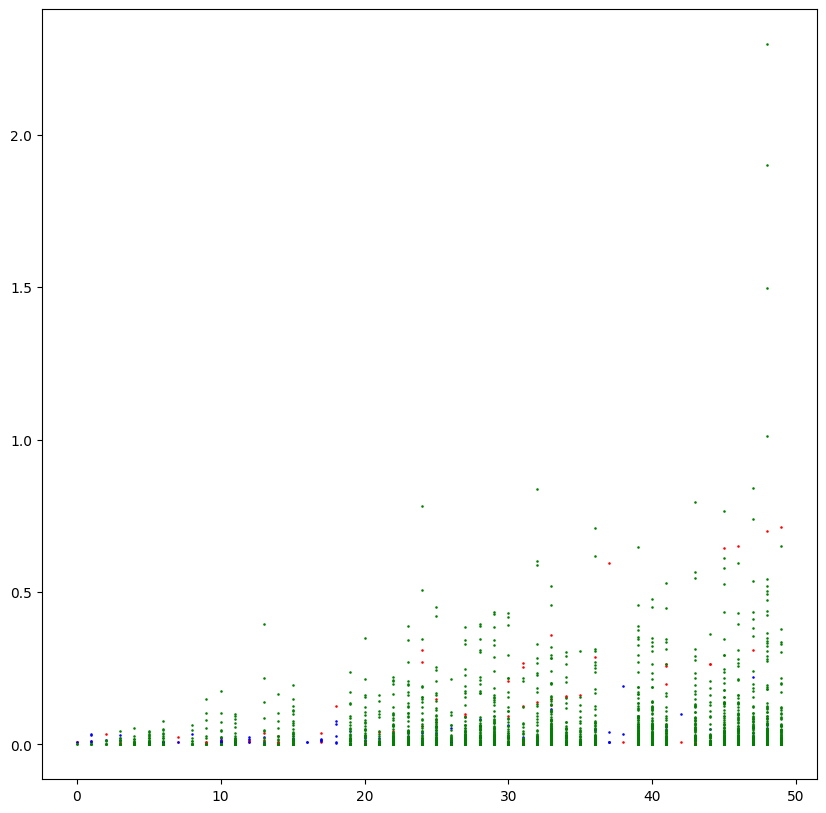

In [51]:
f = plt.figure(figsize=(10,10))
plt.scatter(bubb.inputsize,bubb.avgtime,s=0.7,color='r')
plt.scatter(inse.inputsize,inse.avgtime,s=0.7,color='b')
plt.scatter(quic.inputsize,quic.avgtime,s=0.7,color='g')

In [56]:
bubg = bubb.groupby('inputsize').mean()
insg = inse.groupby('inputsize').mean()
quig = quic.groupby('inputsize').mean()

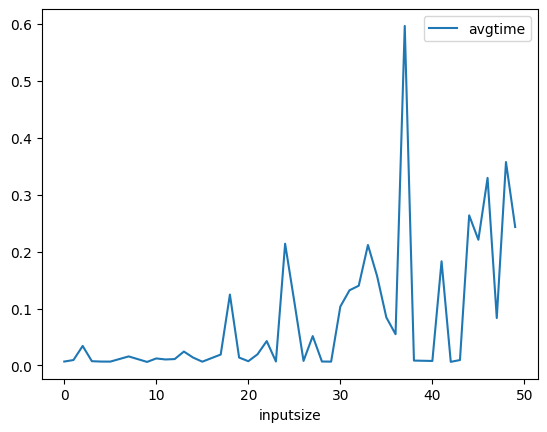

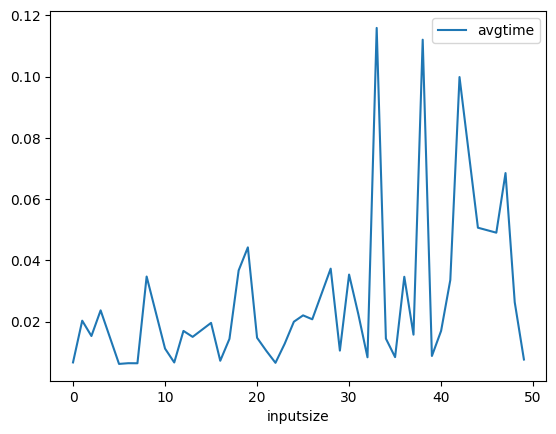

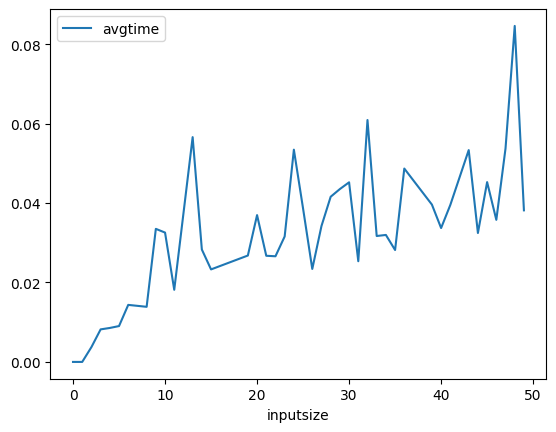

In [64]:
bubg.plot();insg.plot();quig.plot();plt.show()